In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Decoder hidden state
dec_hidden_state = [5, 1, 20]

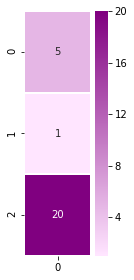

In [15]:
# Visualizing the decoder hidden state
plt.figure(figsize = (1.5, 4.5))
sns.heatmap(data = np.transpose(np.matrix(dec_hidden_state)), 
            annot = True, 
            cmap = sns.light_palette(color = "purple", as_cmap = True), 
            linewidths = 1)

In [16]:
# Encoder hidden state
annotation = [3, 12, 45]

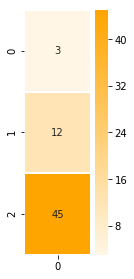

In [27]:
# Visualizing the encoder hidden state
plt.figure(figsize = (1.5, 4.5))
sns.heatmap(data = np.transpose(np.matrix(annotation)),
            cmap = sns.light_palette(color = "orange", as_cmap = True), 
            annot = True, 
            linewidths = 1)

In [30]:
def single_dot_attention_score(dec_hidden_state, enc_hidden_state):
    return np.dot(a = dec_hidden_state, b = enc_hidden_state)

single_dot_attention_score(dec_hidden_state, annotation)

927

In [31]:
# Annotation matrix
annotations = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])

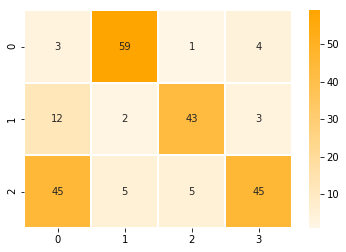

In [40]:
# Visualizing the annotation
ax = sns.heatmap(data = annotations, 
                 annot = True, 
                 cmap = sns.light_palette(color = "orange", as_cmap = True), 
                 linewidths = 1)

In [41]:
# Scoring all attention at once
def dot_attention_score(enc_hidden_state, dec_hidden_state):
    return np.matmul(np.transpose(dec_hidden_state), enc_hidden_state)

# Getting the attention weights raw
attention_weights_raw = dot_attention_score(annotations, dec_hidden_state)
attention_weights_raw

array([927., 397., 148., 929.])

In [44]:
# Defining the softmax
def softmax(x):
    x = np.array(x, dtype = np.float128)
    exp_x = np.exp(x)
    
    return exp_x / np.sum(exp_x, axis = 0)

attention_weights = softmax(attention_weights_raw)
attention_weights

array([1.19202922e-001, 7.94715151e-232, 5.76614420e-340, 8.80797078e-001],
      dtype=float128)

In [46]:
def apply_attention_score(softmax, annotations):
    return softmax * annotations

applied_attention = apply_attention_score(attention_weights, annotations)
applied_attention

array([[3.57608766e-001, 4.68881939e-230, 5.76614420e-340,
        3.52318831e+000],
       [1.43043506e+000, 1.58943030e-231, 2.47944200e-338,
        2.64239123e+000],
       [5.36413149e+000, 3.97357575e-231, 2.88307210e-339,
        3.99001076e+001]], dtype=float128)

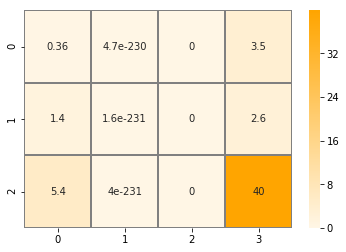

In [55]:
# Visualizing the annotations after applying the attention
sns.heatmap(data = applied_attention, 
            cmap = sns.light_palette(color = "orange", as_cmap = True),
            annot = True, 
            linewidths = 1,
            linecolor = "gray")

In [56]:
def calculate_attention_vector(applied_attention):
    return np.sum(applied_attention, axis = 1)

attention_vector = calculate_attention_vector(applied_attention)
attention_vector

array([ 3.88079708,  4.0728263 , 45.26423912], dtype=float128)

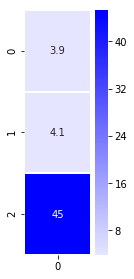

In [64]:
# Visializing the attention vector
plt.figure(figsize = (1.5, 4.5))
sns.heatmap(data = np.transpose(np.matrix(attention_vector)), 
            cmap = sns.light_palette(color = "blue", as_cmap = True), 
            annot = True, 
            linewidths = 1)